
# Ejemplo de árboles de decisión en Python

## Preparación de datos

Primero importamos las 3 librerías a utilizar

In [163]:
import numpy as np
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import tree

Leemos los datos con pandas.
En lugar de una carpeta a un fichero local, también se puede poner una URL

In [164]:
data = pd.read_csv('C:/rafa/docencia/cursos/mates/python/cuestionarios.csv',sep= ',', header= None)

In [165]:
print("Dataset Shape:: ", data.shape)
data.head()

Dataset Shape::  (625, 5)


,0,1,2,3,4
0,C,1,1,1,1
1,D,1,1,1,2
2,D,1,1,1,3
3,D,1,1,1,4
4,D,1,1,1,5


Siempre está bien hacer una descripción inicial de los datos

In [166]:
 print(data.describe())

                1           2           3           4
count  625.000000  625.000000  625.000000  625.000000
mean     3.000000    3.000000    3.000000    3.000000
std      1.415346    1.415346    1.415346    1.415346
min      1.000000    1.000000    1.000000    1.000000
25%      2.000000    2.000000    2.000000    2.000000
50%      3.000000    3.000000    3.000000    3.000000
75%      4.000000    4.000000    4.000000    4.000000
max      5.000000    5.000000    5.000000    5.000000


Para pensar... ¿cómo separar el dataframe *data* en 

* Y : Etiquetas
* X : Features/atributos  ?

In [167]:
y = data.values[:,0]
X = data.values[:, 1:5]

Ahora dividimos entre conjunto de entrenamiento y conjunto de test usando
 *train_test_split()* de la biblioteca sklearn. Al método se le pasan 
 
 * X,Y 
 * test_size: proporción de datos que van al test
 * random_state: Opcional, un número para convertir el método en determinista
 
El método devuelve 4 conjuntos, esto es, la divisón tanto de X como de Y en train y test.

En ocasiones se utiliza un tercer conjunto, el de validación, pero no vamos a hacerlo aquí


In [168]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.3, random_state = 123)

In [169]:
print("X_train.shape: ",X_train.shape)
print("X_test.shape: ",X_test.shape)

X_train.shape:  (437, 4)
X_test.shape:  (188, 4)


## Entrenamiento

Vamos a usar los datos de entrenamiento para preparar un *DecisionTreeClassifier*. 

Algunos parámetros importantes:


* criterion: It defines the function to measure the quality of a split. Sklearn supports “gini” criteria for Gini Index & “entropy” for Information Gain. By default, it takes “gini” value.
* splitter: It defines the strategy to choose the split at each node. Supports “best” value to choose the best split & “random” to choose the best random split. By default, it takes “best” value.
* max_features: It defines the no. of features to consider when looking for the best split. We can input integer, float, string & None value.
..* If an integer is inputted then it considers that value as max features at each split.
..* If float value is taken then it shows the percentage of features at each split.
..* If “auto” or “sqrt” is taken then max_features=sqrt(n_features).
..* If “log2” is taken then max_features= log2(n_features).
..* If None, then max_features=n_features. By default, it takes “None” value.
* max_depth: The max_depth parameter denotes maximum depth of the tree. It can take any integer value or None. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples. By default, it takes “None” value.
* min_samples_split: This tells above the minimum no. of samples reqd. to split an internal node. If an integer value is taken then consider min_samples_split as the minimum no. If float, then it shows percentage. By default, it takes “2” value.
* min_samples_leaf: The minimum number of samples required to be at a leaf node. If an integer value is taken then consider min_samples_leaf as the minimum no. If float, then it shows percentage. By default, it takes “1” value.
* max_leaf_nodes: It defines the maximum number of possible leaf nodes. If None then it takes an unlimited number of leaf nodes. By default, it takes “None” value.
* min_impurity_split: It defines the threshold for early stopping tree growth. A node will split if its impurity is above the threshold otherwise it is a leaf.


In [170]:
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=3, min_samples_leaf=5)


Ahora entrenamos el modelo

In [171]:
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

Ahora probamos otro utilizando la entropía

In [172]:
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100,
 max_depth=3, min_samples_leaf=5)
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

Tras la llamada a fit ya podríamos predecir nuevos valores

In [173]:
print(clf_gini.predict([[4, 4, 3, 3]]))
print(clf_entropy.predict([[4, 4, 3, 3]]))


['D']
['D']


Pero antes tenemos que evaluar la calidad de esta predicción

# Medidas de error: precisión

Comenzamos por aplicar el modelo a los dos conjuntos de test:

In [174]:
y_pred  = clf_gini.predict(X_test)
y_pred_en = clf_entropy.predict(X_test)

Vamos a calcular la precisión (la proporción de objetos clasificados como de una clase que realmente pertenecen a esa clase) mediante el método *accuracy_score()* de sklearn. Parámetros
	

* y_true : 1d array-like, or label indicator array / sparse matrix
    Ground truth (correct) labels.

* y_pred : 1d array-like, or label indicator array / sparse matrix
    Predicted labels, as returned by a classifier.

* normalize : bool, optional (default=True)
    If False, return the number of correctly classified samples. Otherwise, return the fraction of correctly classified samples.

* sample_weight : array-like of shape = [n_samples], optional
    Sample weights.

Una ventaja de este método es que es muy fácil 'jugar' con él:

In [175]:
y_pred_toy = [0, 2, 1, 3]
y_true_toy = [0, 1, 1, 3]
accuracy_score(y_true_toy, y_pred_toy)

0.75

En nuestro caso:

In [176]:
print("Precisión con el índice de Gini ", accuracy_score(y_test,y_pred)*100)
print("Precisión con la entropía ", accuracy_score(y_test,y_pred_en)*100)

Precisión con el índice de Gini  71.8085106383
Precisión con la entropía  71.8085106383


Este dato (para mí) es insuficiente; necesitamos ver al menos la matriz de confusión

#### Ejercicio
Pensar en la precisión y el recall para los siguientes datos, y relacionarlos para la matriz de confusión. Recordar que la primera lista son los valores verdades, y la segunda los predichos

In [177]:
confusion_matrix([1,1,1,1,2,2,2,2,3,3,3,3],[1,1,1,1,2,2,3,3,3,3,3,3])

array([[4, 0, 0],
       [0, 2, 2],
       [0, 0, 4]], dtype=int64)

Ahora podemos ver la matriz de precisión en nuestros métodos

In [178]:
confusion_matrix(y_test,y_pred)

array([[66,  0, 15],
       [10,  0,  5],
       [23,  0, 69]], dtype=int64)

In [179]:
confusion_matrix(y_test,y_pred_en)

array([[63,  0, 18],
       [ 9,  0,  6],
       [20,  0, 72]], dtype=int64)

Parece que pasa algo extraño...

# Random Forest

Empezamos importando nuevas funciones y bibliotecas

In [180]:
from sklearn.ensemble import RandomForestClassifier

In [181]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

Ahora podemos predecir el conjunto de test

In [182]:
y_pred_forest = clf.predict(X_test)

Y calcular la precisión con random forest:

In [183]:
print("Precisión con random forest", accuracy_score(y_test,y_pred_forest)*100)

Precisión con random forest 81.914893617


In [184]:
confusion_matrix(y_test,y_pred_forest)

array([[73,  6,  2],
       [ 8,  0,  7],
       [ 7,  4, 81]], dtype=int64)

¿Observamos que sucede algo extraño?

### Gaussian Bayes

Probar otro método de clasificación ahora es trivial

In [185]:
# To model the Gaussian Navie Bayes classifier
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred_gaussian = clf.predict(X_test)
print("Precisión con Gaussian Bayes", accuracy_score(y_test,y_pred_gaussian)*100)
m = confusion_matrix(y_test,y_pred_gaussian)
print(m)


Precisión con Gaussian Bayes 88.2978723404
[[81  0  0]
 [12  0  3]
 [ 7  0 85]]


Probamos para ver si en efecto nunca predice la segunda clase

In [186]:
from random import randint
preguntas = 4
loop = 10000
contador = {'A':0,'C':0,'D':0}
for j in range(loop):
    cuestionario = []
    for i in range(preguntas):
        cuestionario.append(randint(1, 5))
    p = clf.predict([cuestionario])[0]
    contador[p] = contador[p]+1
print(contador)

{'A': 5480, 'C': 0, 'D': 4520}


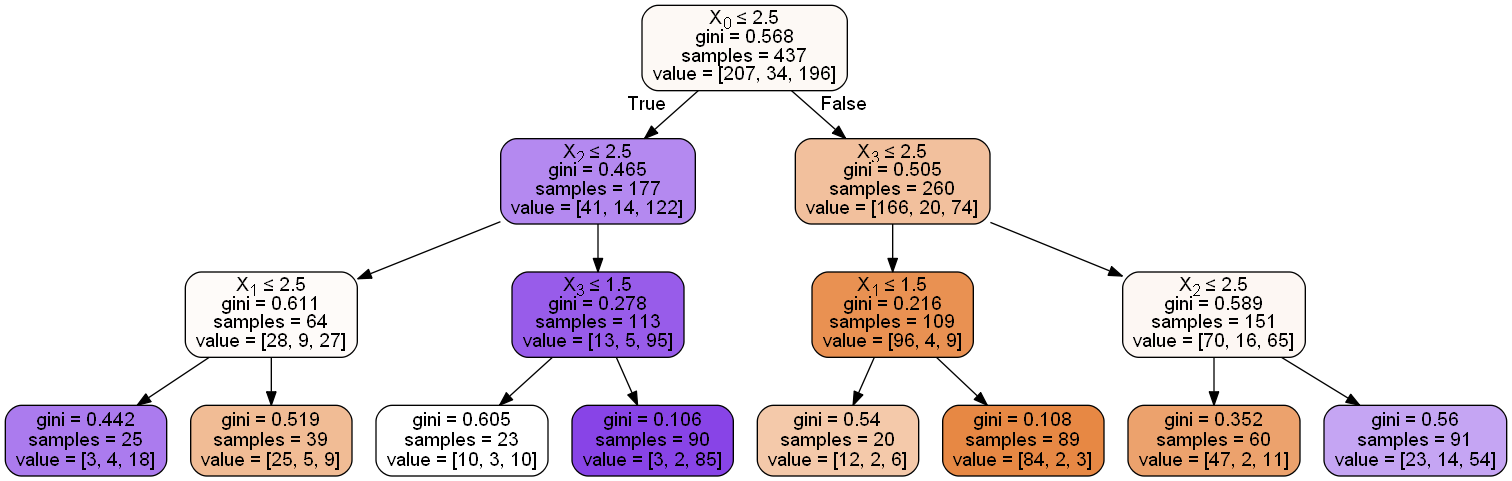

In [187]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

import os     

os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

dot_data = StringIO()

export_graphviz(clf_gini, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

Los datos estan muy mal equilibrados, ¡¡¡¡ hemos hecho todo mal !!!

### Equilibrado de datos

Una función bastante estándar para equilibrar datos en Python

In [198]:
def balanced_subsample(y,prop):

    subsample = []

    n_smp = min(y.value_counts().min()-10,int(prop*len(y)))
   
    for label in y.value_counts().index:
        samples = y[y == label].index.values
        index_range = range(samples.shape[0])
        indexes = np.random.choice(index_range, size=n_smp, replace=False)
        subsample += samples[indexes].tolist()

    rest = [i for i in range(0,len(y)) if not i in subsample ]
    return subsample,rest

Equilibramos el conjunto de entrenamiento

In [199]:
i_train,i_test = balanced_subsample(data[0],0.7)
print('train size', len(i_train), ' i test ', len(i_test))

train size 117  i test  508


In [200]:
y_train, X_train,y_test, X_test = y[i_train], X[i_train],y[i_test], X[i_test]
  


Comprobamos que el conjunto de entrenamiento está equilibrado

In [201]:
for l in ['A','C','D']:
    v = len([a for a in y_train if a == 'A'])
    print(l,v)


A 39
C 39
D 39


In [202]:
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=3, min_samples_leaf=5)


In [203]:
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [204]:
y_pred  = clf_gini.predict(X_test)

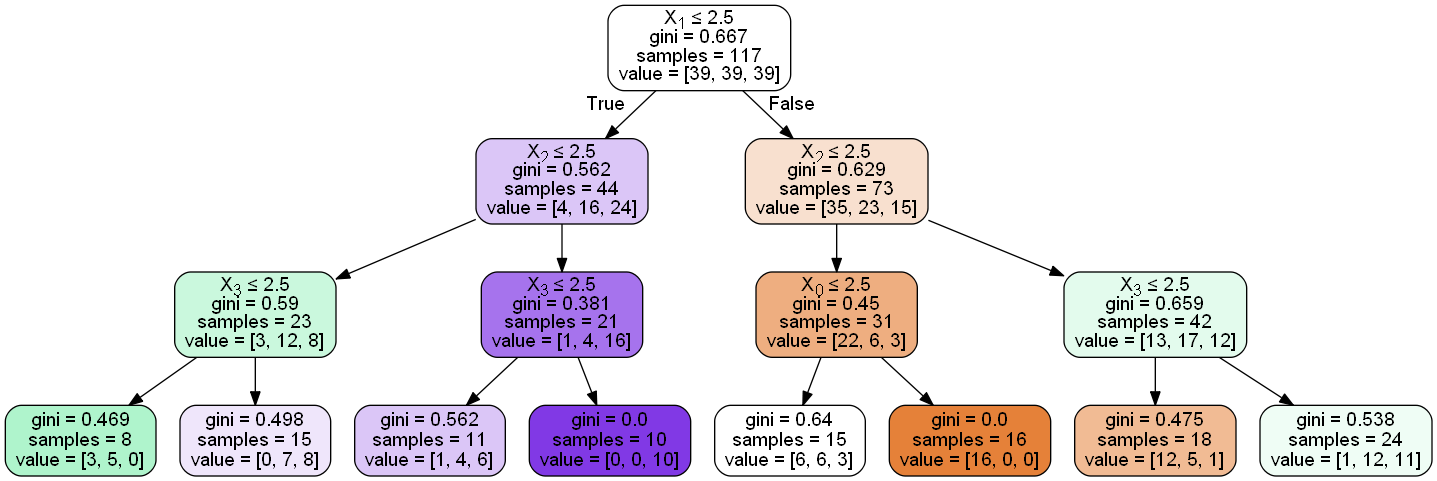

In [205]:
dot_data = StringIO()
export_graphviz(clf_gini, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [206]:
confusion_matrix(y_test,y_pred)

array([[160,  57,  32],
       [  2,   5,   3],
       [ 29,  81, 139]], dtype=int64)

In [207]:
print("Precisión con el índice de Gini ", accuracy_score(y_test,y_pred)*100)

Precisión con el índice de Gini  59.842519685


In [208]:
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred_gaussian = clf.predict(X_test)
print("Precisión con Gaussian Bayes", accuracy_score(y_test,y_pred_gaussian)*100)
m = confusion_matrix(y_test,y_pred_gaussian)
print(m)


Precisión con Gaussian Bayes 66.9291338583
[[167  81   1]
 [  4   6   0]
 [  8  74 167]]


In [209]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred_forest = clf.predict(X_test)
print("Precisión con random forest", accuracy_score(y_test,y_pred_forest)*100)
confusion_matrix(y_test,y_pred_forest)

Precisión con random forest 62.5984251969


array([[161,  86,   2],
       [  5,   4,   1],
       [ 14,  82, 153]], dtype=int64)